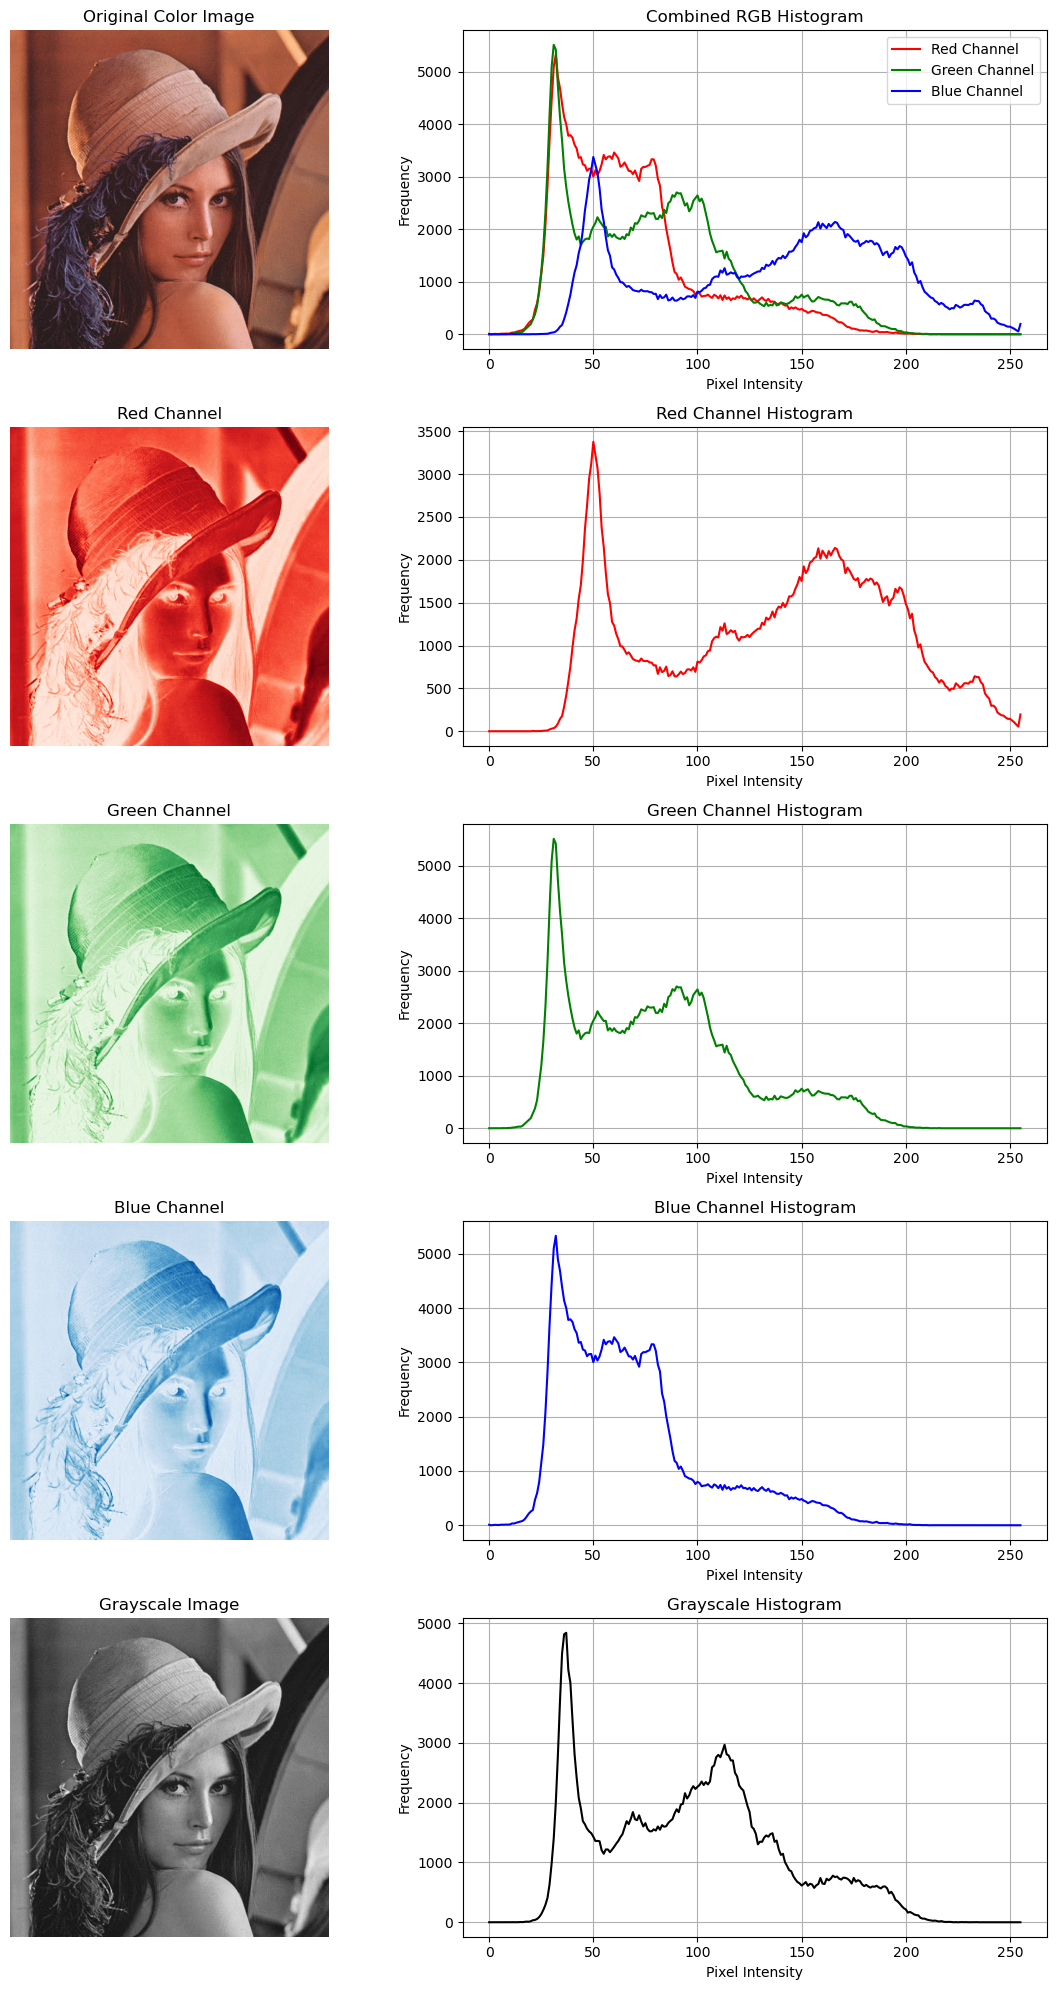

In [11]:
# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt

def plot_two_column_histograms(image):
    """
    Display the image (original and channels) and their histograms side by side in two columns.
    
    Args:
        image: Input color image in BGR format.
    """
    # Convert image to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert image to Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Split the channels
    channels = cv2.split(image)
    colors = ('Red', 'Green', 'Blue')
    channel_histograms = []
    
    # Compute channel histograms
    for i, channel in enumerate(channels):
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        channel_histograms.append(histogram)

    # Compute grayscale histogram
    gray_histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Prepare the layout for visualization
    fig, axes = plt.subplots(5, 2, figsize=(12, 20))

    # Original Image vs Combined Histogram
    axes[0, 0].imshow(image_rgb)
    axes[0, 0].set_title("Original Color Image")
    axes[0, 0].axis('off')
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        axes[0, 1].plot(histogram, label=f"{color} Channel", color=color.lower())
    axes[0, 1].set_title("Combined RGB Histogram")
    axes[0, 1].set_xlabel("Pixel Intensity")
    axes[0, 1].set_ylabel("Frequency")
    axes[0, 1].legend()
    axes[0, 1].grid()

    # Red Channel vs Red Histogram
    axes[1, 0].imshow(channels[2], cmap='Reds')
    axes[1, 0].set_title("Red Channel")
    axes[1, 0].axis('off')
    axes[1, 1].plot(channel_histograms[2], color='red')
    axes[1, 1].set_title("Red Channel Histogram")
    axes[1, 1].set_xlabel("Pixel Intensity")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].grid()

    # Green Channel vs Green Histogram
    axes[2, 0].imshow(channels[1], cmap='Greens')
    axes[2, 0].set_title("Green Channel")
    axes[2, 0].axis('off')
    axes[2, 1].plot(channel_histograms[1], color='green')
    axes[2, 1].set_title("Green Channel Histogram")
    axes[2, 1].set_xlabel("Pixel Intensity")
    axes[2, 1].set_ylabel("Frequency")
    axes[2, 1].grid()

    # Blue Channel vs Blue Histogram
    axes[3, 0].imshow(channels[0], cmap='Blues')
    axes[3, 0].set_title("Blue Channel")
    axes[3, 0].axis('off')
    axes[3, 1].plot(channel_histograms[0], color='blue')
    axes[3, 1].set_title("Blue Channel Histogram")
    axes[3, 1].set_xlabel("Pixel Intensity")
    axes[3, 1].set_ylabel("Frequency")
    axes[3, 1].grid()

    # Grayscale Image vs Grayscale Histogram
    axes[4, 0].imshow(gray_image, cmap='gray')
    axes[4, 0].set_title("Grayscale Image")
    axes[4, 0].axis('off')
    axes[4, 1].plot(gray_histogram, color='black')
    axes[4, 1].set_title("Grayscale Histogram")
    axes[4, 1].set_xlabel("Pixel Intensity")
    axes[4, 1].set_ylabel("Frequency")
    axes[4, 1].grid()

    plt.tight_layout()
    plt.show()

# Define the image path using os.path.join
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Modify this with your image path

# Load the image using OpenCV
image = cv2.imread(image_path)

if image is not None:
    # Plot the histograms in two columns
    plot_two_column_histograms(image)
else:
    print("Image not found. Please check the file path.")
